<a href="https://colab.research.google.com/github/TALeonard/19ma573thomasleonard/blob/master/src/hw10_heat_ftcs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Implementation 01

First, we input the parameters in question. We also import numpy to give access to trigonometric functions and the value $\pi$, as well as pyplot for plotting.

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [0]:
'''========
parameters
========'''

al = 1 #alpha
dx = 0.2 #space mesh size
rho = 0.4 #conditional number, less than .5 for stability
dt = rho*(dx**2)/al #time step size

a = 0
b = 1

f = lambda x: np.sin(np.pi * x)

es = lambda x, t: np.exp((-np.pi**2) * t) * np.sin(np.pi*x)

To find the $L^{\infty}$ error, we need the FTCS solution of the heat equation:

$$\{u_{j}^{n}:\forall j \in Z, n\in N \}$$

From lecture we have the following 2 relations:

$$u_{j}^{0} = \phi(jh) = f(jh), \forall j \in Z$$

$$u_{j}^{n+1} = su_{j+1}^{n} + (1 - 2s)u_{j}^{n} + su_{j-1}^{n}, \forall j \in Z, n + 1 \in N $$

Where

$$s = \frac{\theta}{h^{2}} = \frac{dt}{(dx)^{2}}$$

We will consider the interval as given in the parameters; the lower bound will be $a = 0$ and the upper bound will be $b = 1$. No $n$ is given, so I will opt to develop a code which lets me input $n$ myself. Given this parameter setup defines $dt$ as a function of $dx$, $\rho$, and $\alpha$, I will opt to include those in the arguments for the function and calculate $dt$ from them.

In [0]:
def heat_ftcs_err(dx,rho,al,exact_sol,phi,a,b,n):
  dt = rho*(dx**2)/al
  
  #Initialize with n = 0.
  j_0_linspace = np.linspace((a-n),(b+n),(b+n)-(a-n)+1)
  u_j_0 = np.zeros(len(j_0_linspace))
  for i in range(len(j_0_linspace)):
    u_j_0[i] = phi(j_0_linspace[i]*dx)
  
  #Initialize True Values Matrix.
  true_val = np.zeros(len(j_0_linspace))
  for j in range(len(j_0_linspace)):
    true_val[j] = exact_sol(j_0_linspace[j]*dx,0)
  
  #Initialize error vector, apply max error value for n = 0.
  max_error_vec = np.zeros(n+1)
  err_j_0 = (u_j_0 - true_val)
  max_error_vec[0] = max(abs(err_j_0))
  
  #Initialize approximation for n = 1, to use as first "u_j_(k-1)"
  j_1_linspace = np.linspace((a-(n-1)),(b+(n-1)),(b+(n-1))-(a-(n-1))+1)
  u_j_1 = np.zeros(len(j_1_linspace))
  for i in range(len(u_j_1)):
    j = i + 1
    u_j_1[i] = rho*u_j_0[j-1] + (1-2*rho)*u_j_0[j] + rho*u_j_0[j+1]
  
  u_j_k_minus_1 = u_j_1
  former_linspace = j_1_linspace
  
  #Find n = 1 max error for vector.
  true_val = np.zeros(len(j_1_linspace))
  for j in range(len(j_1_linspace)):
    true_val[j] = exact_sol(j_1_linspace[j]*dx,dt)
  err_j_1 = (u_j_1 - true_val)
  max_error_vec[1] = max(abs(err_j_1))
  
  #Perform iterative loop for all n >= 2.
  for k in range(2,n+1):
    #Create new linspace for u_j_k.
    new_linspace = np.linspace(a-(n-k),b+(n-k),(b+(n-k))-(a-(n-k))+1)
    u_j_k = np.zeros(len(new_linspace))
    
    #Iterate and fill u_j_k.
    for i in range(len(new_linspace)):
      j = i + 1
      u_j_k[i] = rho*u_j_k_minus_1[j-1] + (1 - 2*rho)*u_j_k_minus_1[j] + rho*u_j_k_minus_1[j+1]
    
    #Produce true values for comparison, and append to max vector.
    true_val = np.zeros(len(new_linspace))
    for i in range(len(new_linspace)):
      true_val[i] = exact_sol(new_linspace[i]*dx,k*dt)
    err_j_k = (u_j_k - true_val)
    max_error_vec[k] = max(abs(err_j_k))
    
    #Identify new values for former_linspace and u_j_(k-1), which allows us to
    #Continue the loop.
    former_linspace = new_linspace
    u_j_k_minus_1 = u_j_k
  
  true_err_max = max(max_error_vec)
  for i in range(len(max_error_vec)):
    if true_err_max == max_error_vec[i]:
      err_n = i
      
  return true_err_max, err_n, max_error_vec

It's probably messier than it has to be, but it works (based off testing which I have opted to omit, which involved me doing this "by hand" using lines of code first, and then developing my universal function algorithm from that). Run a few test cases with $n = 5, 10, 15, 20$ and a more extreme $n = 100$ to see how it develops.

In [22]:
output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 5)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 10)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 15)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 20)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 100)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

Max Error is 0.015707867040970103and occurs for some j when n = 4
Max Error is 0.01704680049447277and occurs for some j when n = 6
Max Error is 0.01704680049447277and occurs for some j when n = 6
Max Error is 0.01704680049447277and occurs for some j when n = 6
Max Error is 0.0170468004944741and occurs for some j when n = 6


The error is capping at n = 6. What if we graph the max error value for each individual exponent $u_{j}^{n}$?

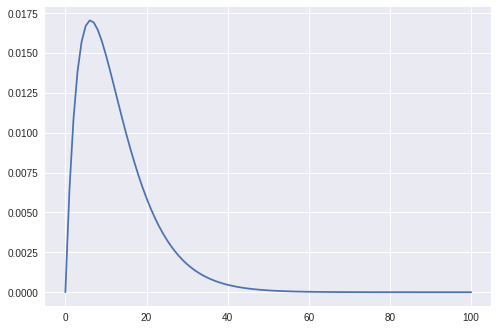

In [23]:
output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 100)
n_vec = output[2]
n_index = np.linspace(0,100,101)
plt.plot(n_index,n_vec)

Thus, the $L^{\infty}$ error for this is roughly $0.0170468$.

For the next problem, we want to plot error curves relating to $t = 1.95, 1.97, 1.98$. To do this, I am opting to do the following:

To plot error, we need the relevant $u_{j}^{n}$ corresponding to $u(jh, n\theta)$ where $h = dx$ and $\theta = dt$. Thus, we want $n\theta = 1.95, 1.97, 1.98$. As $\theta = \rho * \frac{dx^{2}}{\alpha} = 0.4*\frac{.2^{2}}{1} = 0.016$, we need $n(0.016) = 1.95, 1.97, 1.98$ or $n = 121.875, 123.125, 123.75$. As the approximation's step through time does not hit these exact values of n, I will opt to round and instead use $n = 122, 123, 124$ as my approximations.

First, I modify my function to allow me to extract the relevant assets for a specified n-value - the list of $j$ values the function u_j_k makes use of at that point and the error at these points. The values of u_j_k and the true values are not needed, as we are solely plotting the error curves here.

In [0]:
def heat_ftcs_reqval(dx,rho,al,exact_sol,phi,a,b,n,reqval):
  dt = rho*(dx**2)/al
  
  #Initialize with n = 0.
  j_0_linspace = np.linspace((a-n),(b+n),(b+n)-(a-n)+1)
  u_j_0 = np.zeros(len(j_0_linspace))
  for i in range(len(j_0_linspace)):
    u_j_0[i] = phi(j_0_linspace[i]*dx)
  
  #Initialize True Values Matrix.
  true_val = np.zeros(len(j_0_linspace))
  for j in range(len(j_0_linspace)):
    true_val[j] = exact_sol(j_0_linspace[j]*dx,0)
  
  #Initialize error vector, apply max error value for n = 0.
  max_error_vec = np.zeros(n+1)
  err_j_0 = (u_j_0 - true_val)
  max_error_vec[0] = max(abs(err_j_0))
  
  #Initialize approximation for n = 1, to use as first "u_j_(k-1)"
  j_1_linspace = np.linspace((a-(n-1)),(b+(n-1)),(b+(n-1))-(a-(n-1))+1)
  u_j_1 = np.zeros(len(j_1_linspace))
  for i in range(len(u_j_1)):
    j = i + 1
    u_j_1[i] = rho*u_j_0[j-1] + (1-2*rho)*u_j_0[j] + rho*u_j_0[j+1]
  
  u_j_k_minus_1 = u_j_1
  former_linspace = j_1_linspace
  
  #Find n = 1 max error for vector.
  true_val = np.zeros(len(j_1_linspace))
  for j in range(len(j_1_linspace)):
    true_val[j] = exact_sol(j_1_linspace[j]*dx,dt)
  err_j_1 = (u_j_1 - true_val)
  max_error_vec[1] = max(abs(err_j_1))
  
  #Perform iterative loop for all n >= 2.
  for k in range(2,n+1):
    #Create new linspace for u_j_k.
    new_linspace = np.linspace(a-(n-k),b+(n-k),(b+(n-k))-(a-(n-k))+1)
    u_j_k = np.zeros(len(new_linspace))
    
    #Iterate and fill u_j_k.
    for i in range(len(new_linspace)):
      j = i + 1
      u_j_k[i] = rho*u_j_k_minus_1[j-1] + (1 - 2*rho)*u_j_k_minus_1[j] + rho*u_j_k_minus_1[j+1]
    
    #Produce true values for comparison, and append to max vector.
    true_val = np.zeros(len(new_linspace))
    for i in range(len(new_linspace)):
      true_val[i] = exact_sol(new_linspace[i]*dx,k*dt)
    err_j_k = (u_j_k - true_val)
    max_error_vec[k] = max(abs(err_j_k))
    
    #Check if current value of n matches requested value. If it does, extract it.
    if k == reqval:
      req_linspace = new_linspace
      #req_u_j_k = u_j_k
      #req_true_val = true_val
      req_err = err_j_k
    else:
      pass
    
    #Identify new values for former_linspace and u_j_(k-1), which allows us to
    #Continue the loop.
    former_linspace = new_linspace
    u_j_k_minus_1 = u_j_k
  
  return req_linspace, req_err

I will use the "main" n as n = 130:

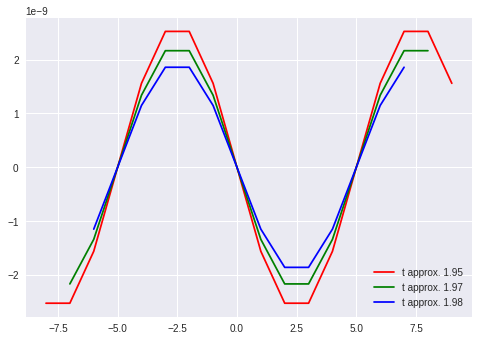

In [25]:
output_1 = heat_ftcs_reqval(dx, rho, al, es, f, 0, 1, 130, 122)
x_1 = output_1[0]
y_1 = output_1[1]

output_2 = heat_ftcs_reqval(dx, rho, al, es, f, 0, 1, 130, 123)
x_2 = output_2[0]
y_2 = output_2[1]

output_3 = heat_ftcs_reqval(dx, rho, al, es, f, 0, 1, 130, 124)
x_3 = output_3[0]
y_3 = output_3[1]

plt.plot(x_1, y_1, 'r', x_2, y_2, 'g', x_3, y_3, 'b')
plt.legend(['t approx. 1.95', 't approx. 1.97', 't approx. 1.98'], loc=4)

We can see that even here the error is decreasing as t is getting larger. The "jagged" nature of the curves (I'm not sure of a better word offhand for it) is likely due to the nature of the system being set up. Note that all of these are on the order of $10^{-9}$.

Now, graph the exact solution in 3D.

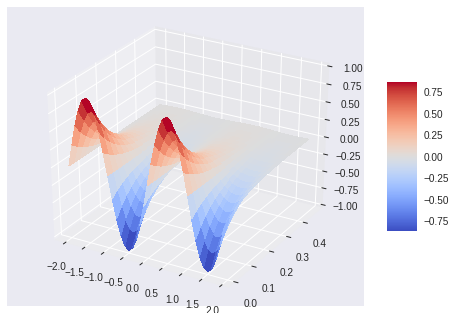

In [26]:
fig = plt.figure()
ax = fig.gca(projection='3d')

x_var = np.arange(-2,2,0.1)
t_var = np.arange(0,0.5,0.025)
x_var, t_var = np.meshgrid(x_var, t_var)

u = es(x_var, t_var)

surf = ax.plot_surface(x_var,t_var,u, cmap = cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

#Implementation 02

Now, consider the second implementation. Define $\rho = 1$, leaving all else the same.

In [0]:
rho = 1
dt = rho*(dx**2)/al

As all else is left the same, once more find the $L^{\infty}$ error using the above code snippets.

In [28]:
output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 5)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 10)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 15)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 20)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 100)
print("Max Error is " + str(output[0]) + "and occurs for some j when n = " + str(output[1]))

Max Error is 0.06854713922733136and occurs for some j when n = 2
Max Error is 0.0685471392273318and occurs for some j when n = 2
Max Error is 0.0685471392273318and occurs for some j when n = 2
Max Error is 0.06854713922733208and occurs for some j when n = 2
Max Error is 1.4526148069835715e+30and occurs for some j when n = 100


That seems odd. When we jump to $n = 100$, the max error has blown up in an almost spectacular fashion. Let's graph and see what happened.

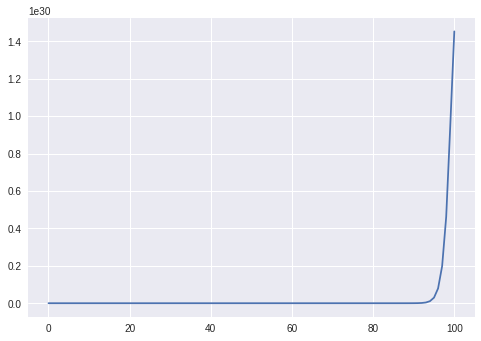

In [29]:
output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 100)
n_vec = output[2]
n_index = np.linspace(0,100,101)
plt.plot(n_index,n_vec)

Let's try graphing it with $n = 20$ for a comparison.

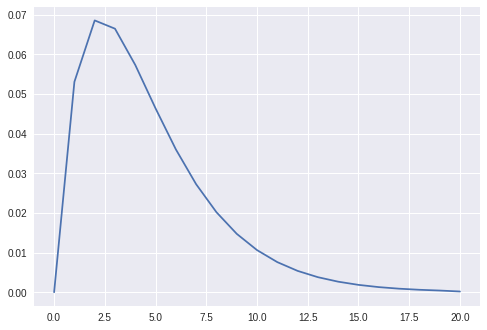

In [30]:
output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 20)
n_vec = output[2]
n_index = np.linspace(0,20,21)
plt.plot(n_index,n_vec)

As of this point, it hasn't exploded yet. From trial and error, consider $n = 35$:

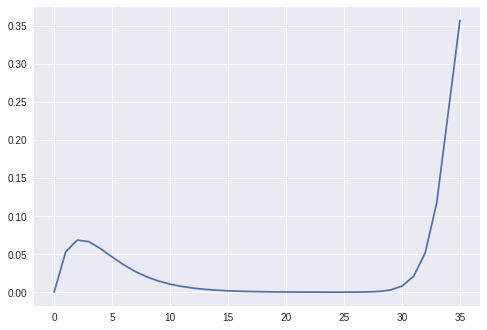

In [31]:
output = heat_ftcs_err(dx, rho, al, es, f, 0, 1, 35)
n_vec = output[2]
n_index = np.linspace(0,35,36)
plt.plot(n_index,n_vec)

Shortly after $n = 30$, the error starts to skyrocket again and (as we saw in the first of these graphs) quickly shoots up towards infinity. Thus, $L^{\infty}$ for $\rho = 1$ is $\infty$.

Now, consider the requested error curves.

We need $t = 1.88, 1.92, 1.96$.

We have here that $dt = \rho * \frac{(dx)^{2}}{\alpha} = 1 * \frac{(0.2)^{2}}{1} = 0.04$.

We need $n\theta = n*dt = 1.88, 1.92, 1.96$, or that $n = 47, 48, 49$.

By this point the error will have gone off the rails, so I expect something quite interesting. Use $n = 55$.

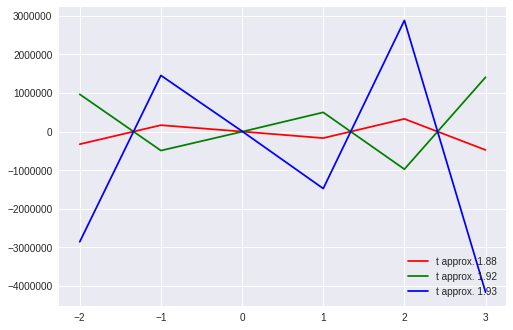

In [43]:
output_1 = heat_ftcs_reqval(dx, rho, al, es, f, 0, 1, 49, 47)
x_1 = output_1[0]
y_1 = output_1[1]

output_2 = heat_ftcs_reqval(dx, rho, al, es, f, 0, 1, 50, 48)
x_2 = output_2[0]
y_2 = output_2[1]

output_3 = heat_ftcs_reqval(dx, rho, al, es, f, 0, 1, 51, 49)
x_3 = output_3[0]
y_3 = output_3[1]

plt.plot(x_1, y_1, 'r', x_2, y_2, 'g', x_3, y_3, 'b')
plt.legend(['t approx. 1.88', 't approx. 1.92', 't approx. 1.93'], loc=4)

We can see from these that there may, in fact, be intersections; they do not occur at every point but where they occur it appears the values are close to 0. Examine the lists more closely.

In [44]:
print("X_1 and Y_1")
print(x_1)
print(y_1)

print("X_2 and Y_2")
print(x_2)
print(y_2)

print("X_3 and Y_3")
print(x_3)
print(y_3)

X_1 and Y_1
[-2. -1.  0.  1.  2.  3.]
[-327021.81682946  166460.23040311     976.47499242 -168562.11202103
  329568.11413456 -476996.46854142]
X_2 and Y_2
[-2. -1.  0.  1.  2.  3.]
[ 967201.63879598 -492505.57224016   -3078.35661033  499106.701148
 -975126.694697   1410028.83715806]
X_3 and Y_3
[-2. -1.  0.  1.  2.  3.]
[-2859641.52021542  1456628.85442581     9679.48551817 -1477311.75245533
  2884262.23300306 -4166979.402051  ]


Conclusion: It was just the way the graph is "interpolating" points. There aren't any intersections (or I've done something wrong, if there are supposed to be intersections). It is worth noting, at the least, that all values get close to 0 when j = 0.

I'm not entirely sure why they get close together, though I suspect it has something to do with the fact that before (when $\rho = 0.4$), all the $u_{j}^{n}$ terms were 0 when $j = 0$. This partially stemmed from the fact that the baseline function was $sin(\pi*x)$, which is $0$ when $x = 0$. As $u_{j}^{0} = f(j)$, we would see that the central value was always $0$ going up the line. Further, $sin(\pi x)$ is mirrored across the origin, i.e. for a specific value of $x$, $sin(\pi (-x)) = -sin(\pi x)$. Thus, since the two had equal weighting in our current scheme, they would cancel each other out and leave us with $u_{0}^{n} = (1-2\rho)u_{0}^{n-1}$, which was always 0 because $u_{0}^{0} = 0$.

Something about this modified $\rho$ breaks the scheme as a whole, which is why everything explodes; however, a remnant of this former scheme still exists within the system (since it runs off the same baseline $sin(\pi x)$ function). I believe this is why the 3 error lines are close to overlapping at $0$.

I'm not sure how I'd demonstrate it mathematically, unfortunately.